# Avacado Price Prediction

In [1]:
#Importing Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import power_transform,StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')

Importing necessary libraries

In [2]:
df = pd.read_csv('avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Importing the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


We can see that there are no null value available in the dataset

In [4]:
df.shape

(18249, 14)

We have 18249 rows and 14 columns in this dataset

In [5]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


As we can see there are noo null values in this dataset

In [6]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

All Column Names

In [7]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [8]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

As we can see that the date column is showing object data type , so we need to convert it into int and seprate the month and day column as well

In [9]:
df.drop('Unnamed: 0',axis = 1,inplace = True)
df.drop('Date',axis = 1 ,inplace = True)

In [10]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


As we can see the date and month column has been separated

In [11]:
df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
Day             0
dtype: int64

<AxesSubplot:xlabel='Total Volume'>

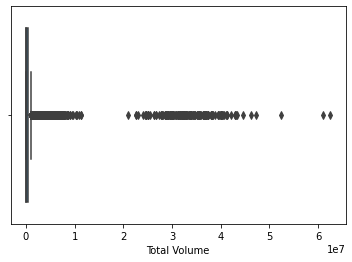

In [12]:
sns.boxplot(df['Total Volume'])

Huge amount of outliers are present in the dataset

<AxesSubplot:xlabel='4046'>

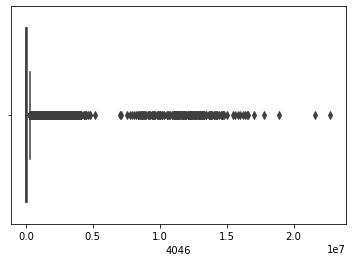

In [13]:
sns.boxplot(df['4046'])

Huge amount of outliers are present in the dataset

<AxesSubplot:xlabel='4225'>

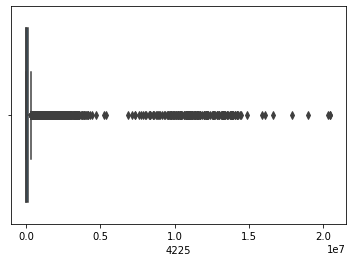

In [14]:
sns.boxplot(df['4225'])

Huge amount of outliers are present in the dataset

<AxesSubplot:xlabel='4770'>

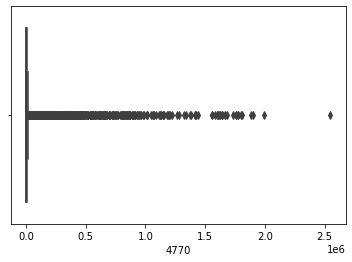

In [15]:
sns.boxplot(df['4770'])

Huge amount of outliers are present in the dataset

<AxesSubplot:xlabel='Small Bags'>

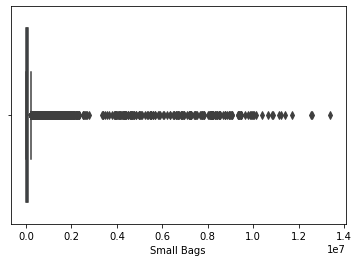

In [16]:
sns.boxplot(df['Small Bags'])

Huge amount of outliers are present in the dataset

<AxesSubplot:xlabel='Large Bags'>

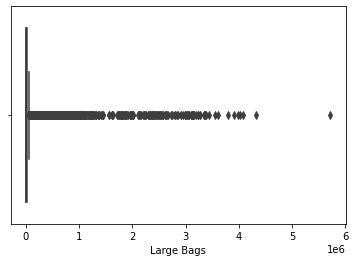

In [17]:
sns.boxplot(df['Large Bags'])

Huge amount of outliers are present in the dataset

<AxesSubplot:xlabel='XLarge Bags'>

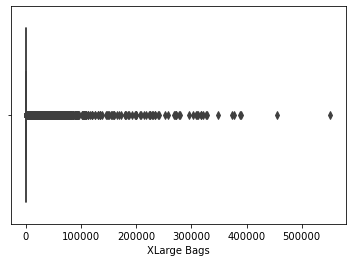

In [18]:
sns.boxplot(df['XLarge Bags'])

Huge amount of outliers are present in the dataset

<AxesSubplot:xlabel='year'>

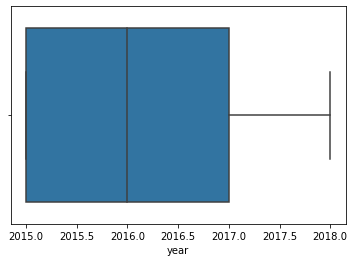

In [19]:
sns.boxplot(df['year'])

<AxesSubplot:xlabel='region', ylabel='AveragePrice'>

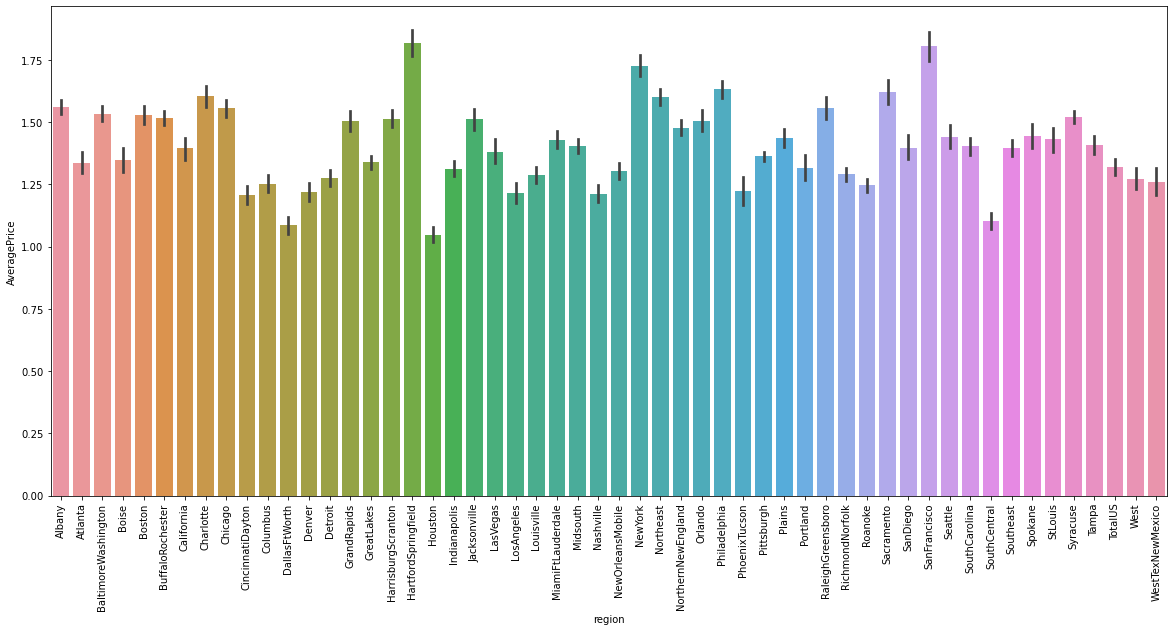

In [20]:
fig = plt.figure(figsize = (20,9))
plt.xticks(rotation = 90)
sns.barplot(data = df, x ='region',y ='AveragePrice')

As per the above observation we can see the average price in different regions 

<AxesSubplot:xlabel='region', ylabel='AveragePrice'>

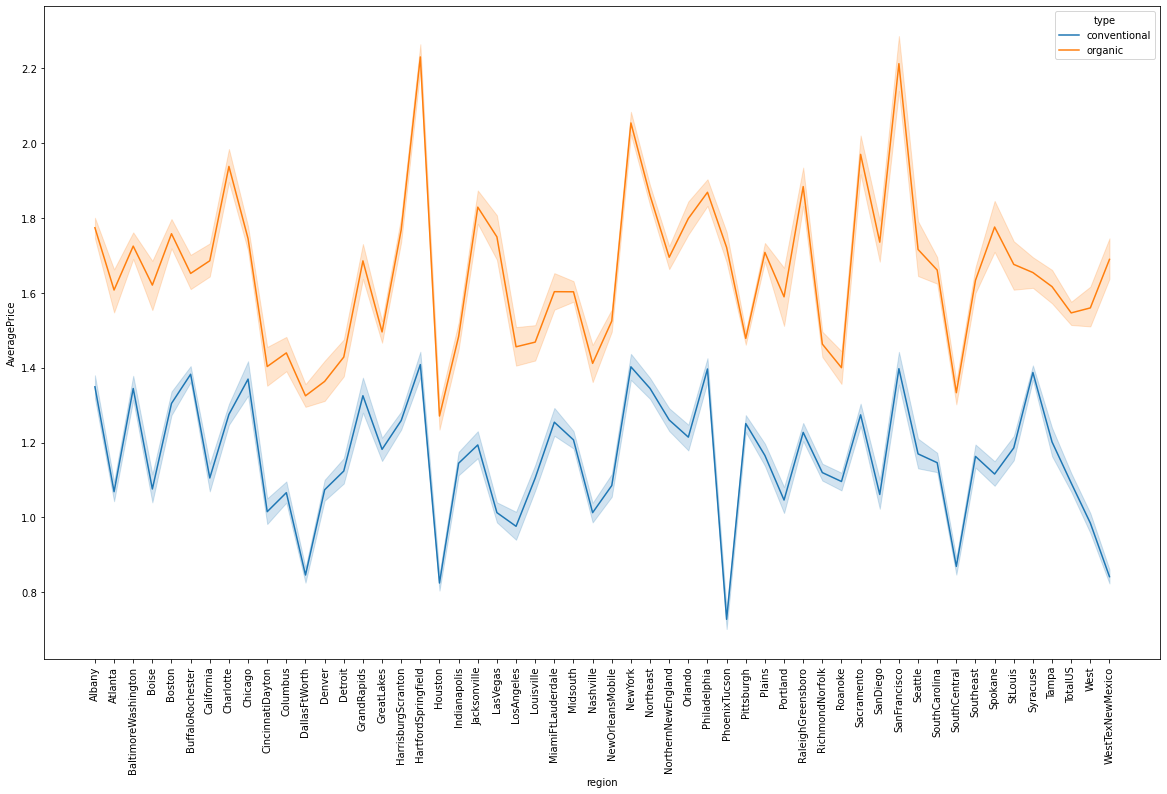

In [21]:
fig = plt.figure(figsize = (20,12))
plt.xticks(rotation = 90)
sns.lineplot(data = df, x ='region',y ='AveragePrice',hue = 'type')

Same as the above graph it is showing the avg price on the basis of regions 

<AxesSubplot:xlabel='region', ylabel='Total Volume'>

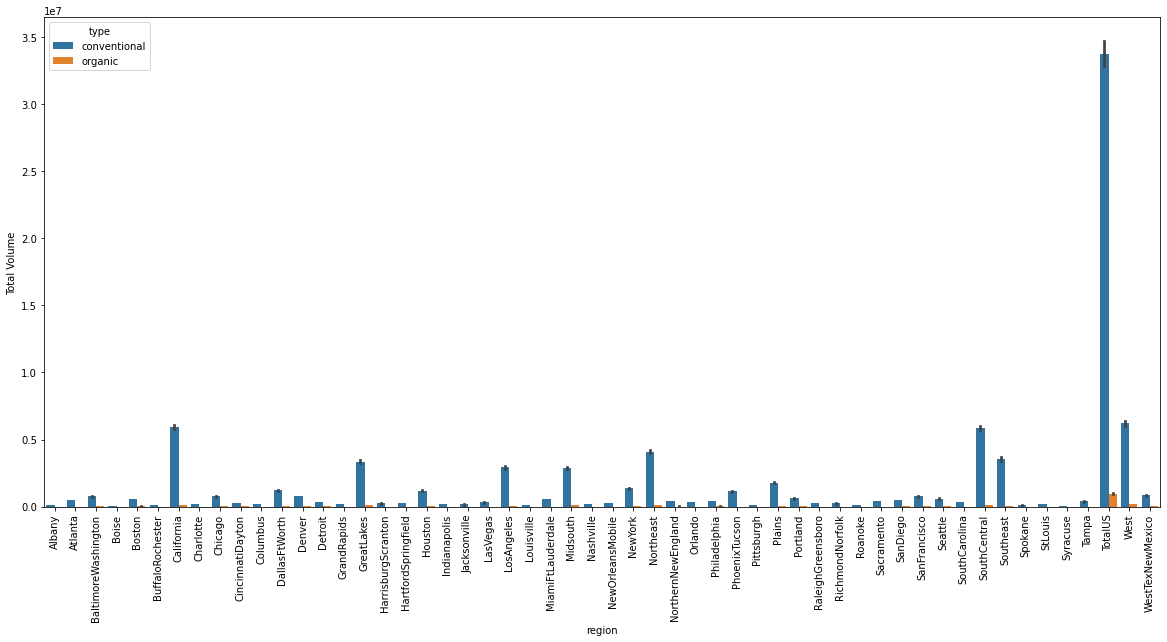

In [22]:
fig = plt.figure(figsize = (20,9))
plt.xticks(rotation = 90)
sns.barplot(data = df, x ='region',y ='Total Volume',hue = 'type')

From the above observation we can see that conventional type is more than the organic and it is more in west side

<AxesSubplot:xlabel='region', ylabel='Total Volume'>

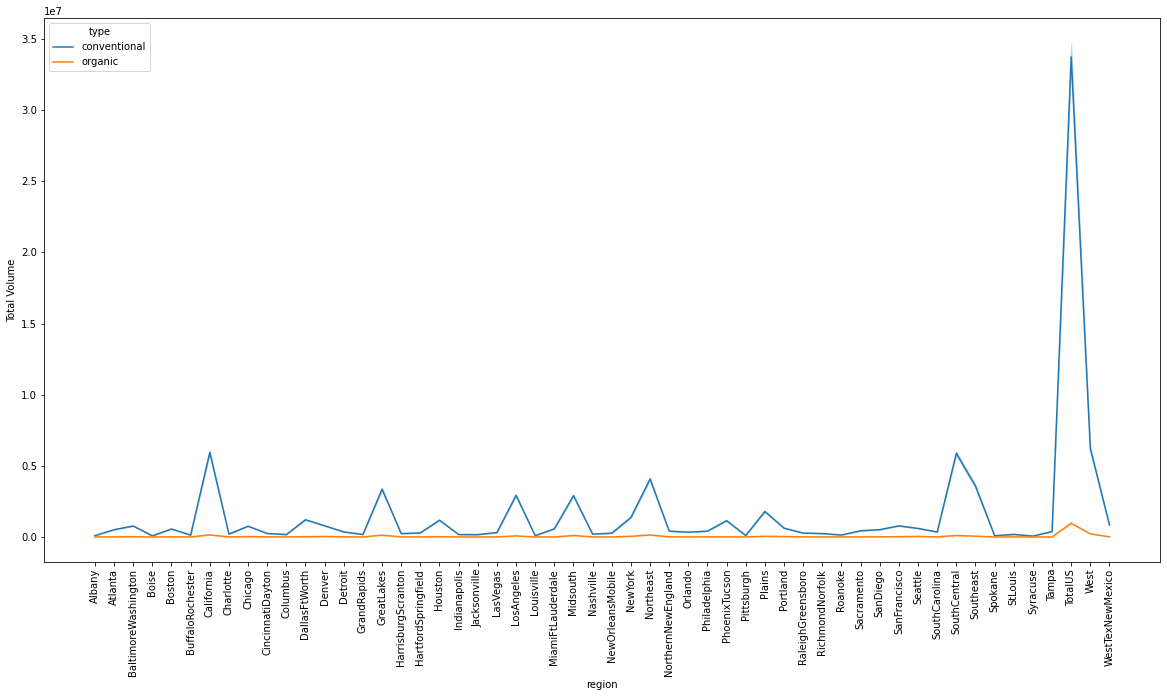

In [23]:
fig = plt.figure(figsize = (20,10))
plt.xticks(rotation = 90)
sns.lineplot(data = df, x ='region',y ='Total Volume',hue = 'type')

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

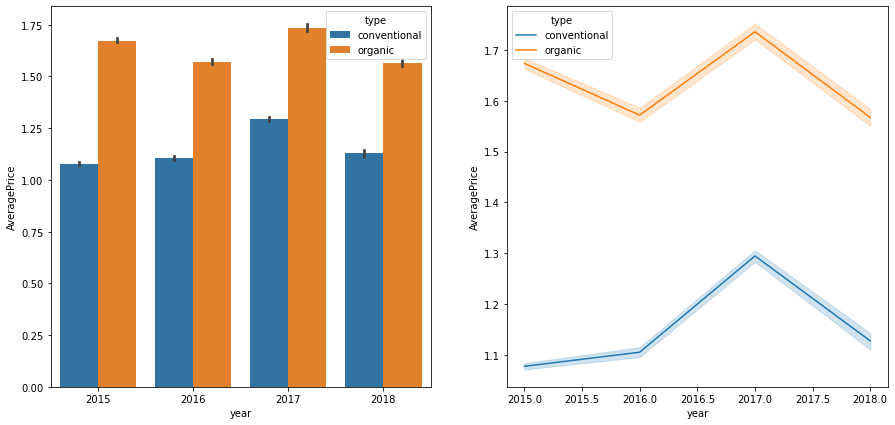

In [24]:
fig = plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
sns.barplot(data = df, x ='year',y ='AveragePrice',hue = 'type')
plt.subplot(1,2,2)
sns.lineplot(data = df, x = 'year',y = 'AveragePrice',hue = 'type')


From the above observation we can say that the avg price is more in year 2017 and it is more in organic type and less in conventional type

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

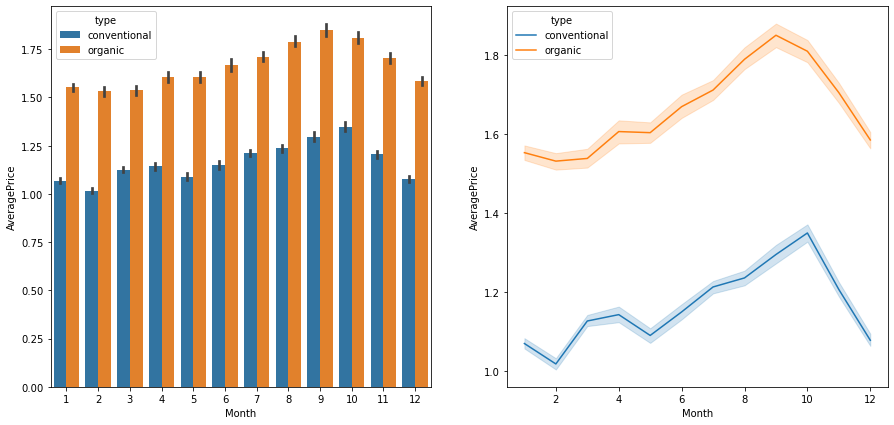

In [25]:
fig = plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
sns.barplot(data = df, x ='Month',y ='AveragePrice',hue = 'type')
plt.subplot(1,2,2)
sns.lineplot(data = df, x = 'Month',y = 'AveragePrice',hue = 'type')

From the above observation we can say that avg price is increading in month 8 to 10 and decrease in month 2nd 

<AxesSubplot:>

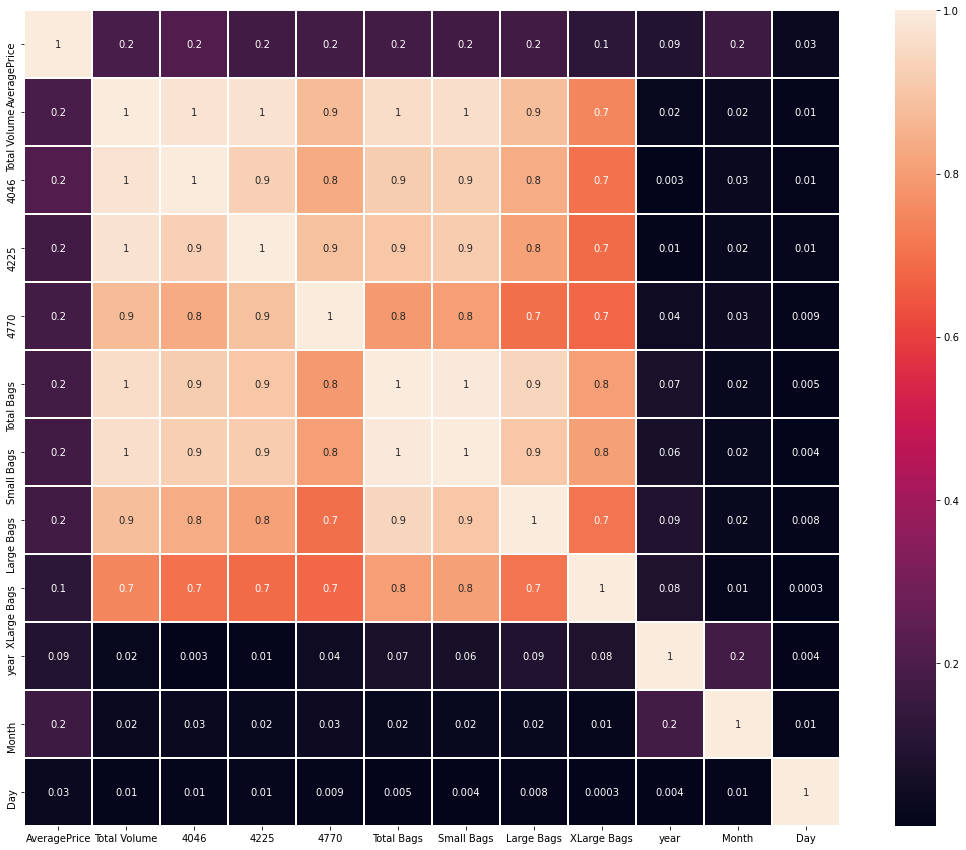

In [26]:
df_corr = df.corr().abs()
plt.figure(figsize = (20,15))
sns.heatmap(df_corr, annot = True,square = True,
           fmt='.1g', linewidth = 1)

From the above observation we can see that there is major corelation in bbetween all the column

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var = ['type','region']
for i in var:
    df[i] = le.fit_transform(df[i])
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,1,14


Encoding the categorical columns into numericals by label encoder

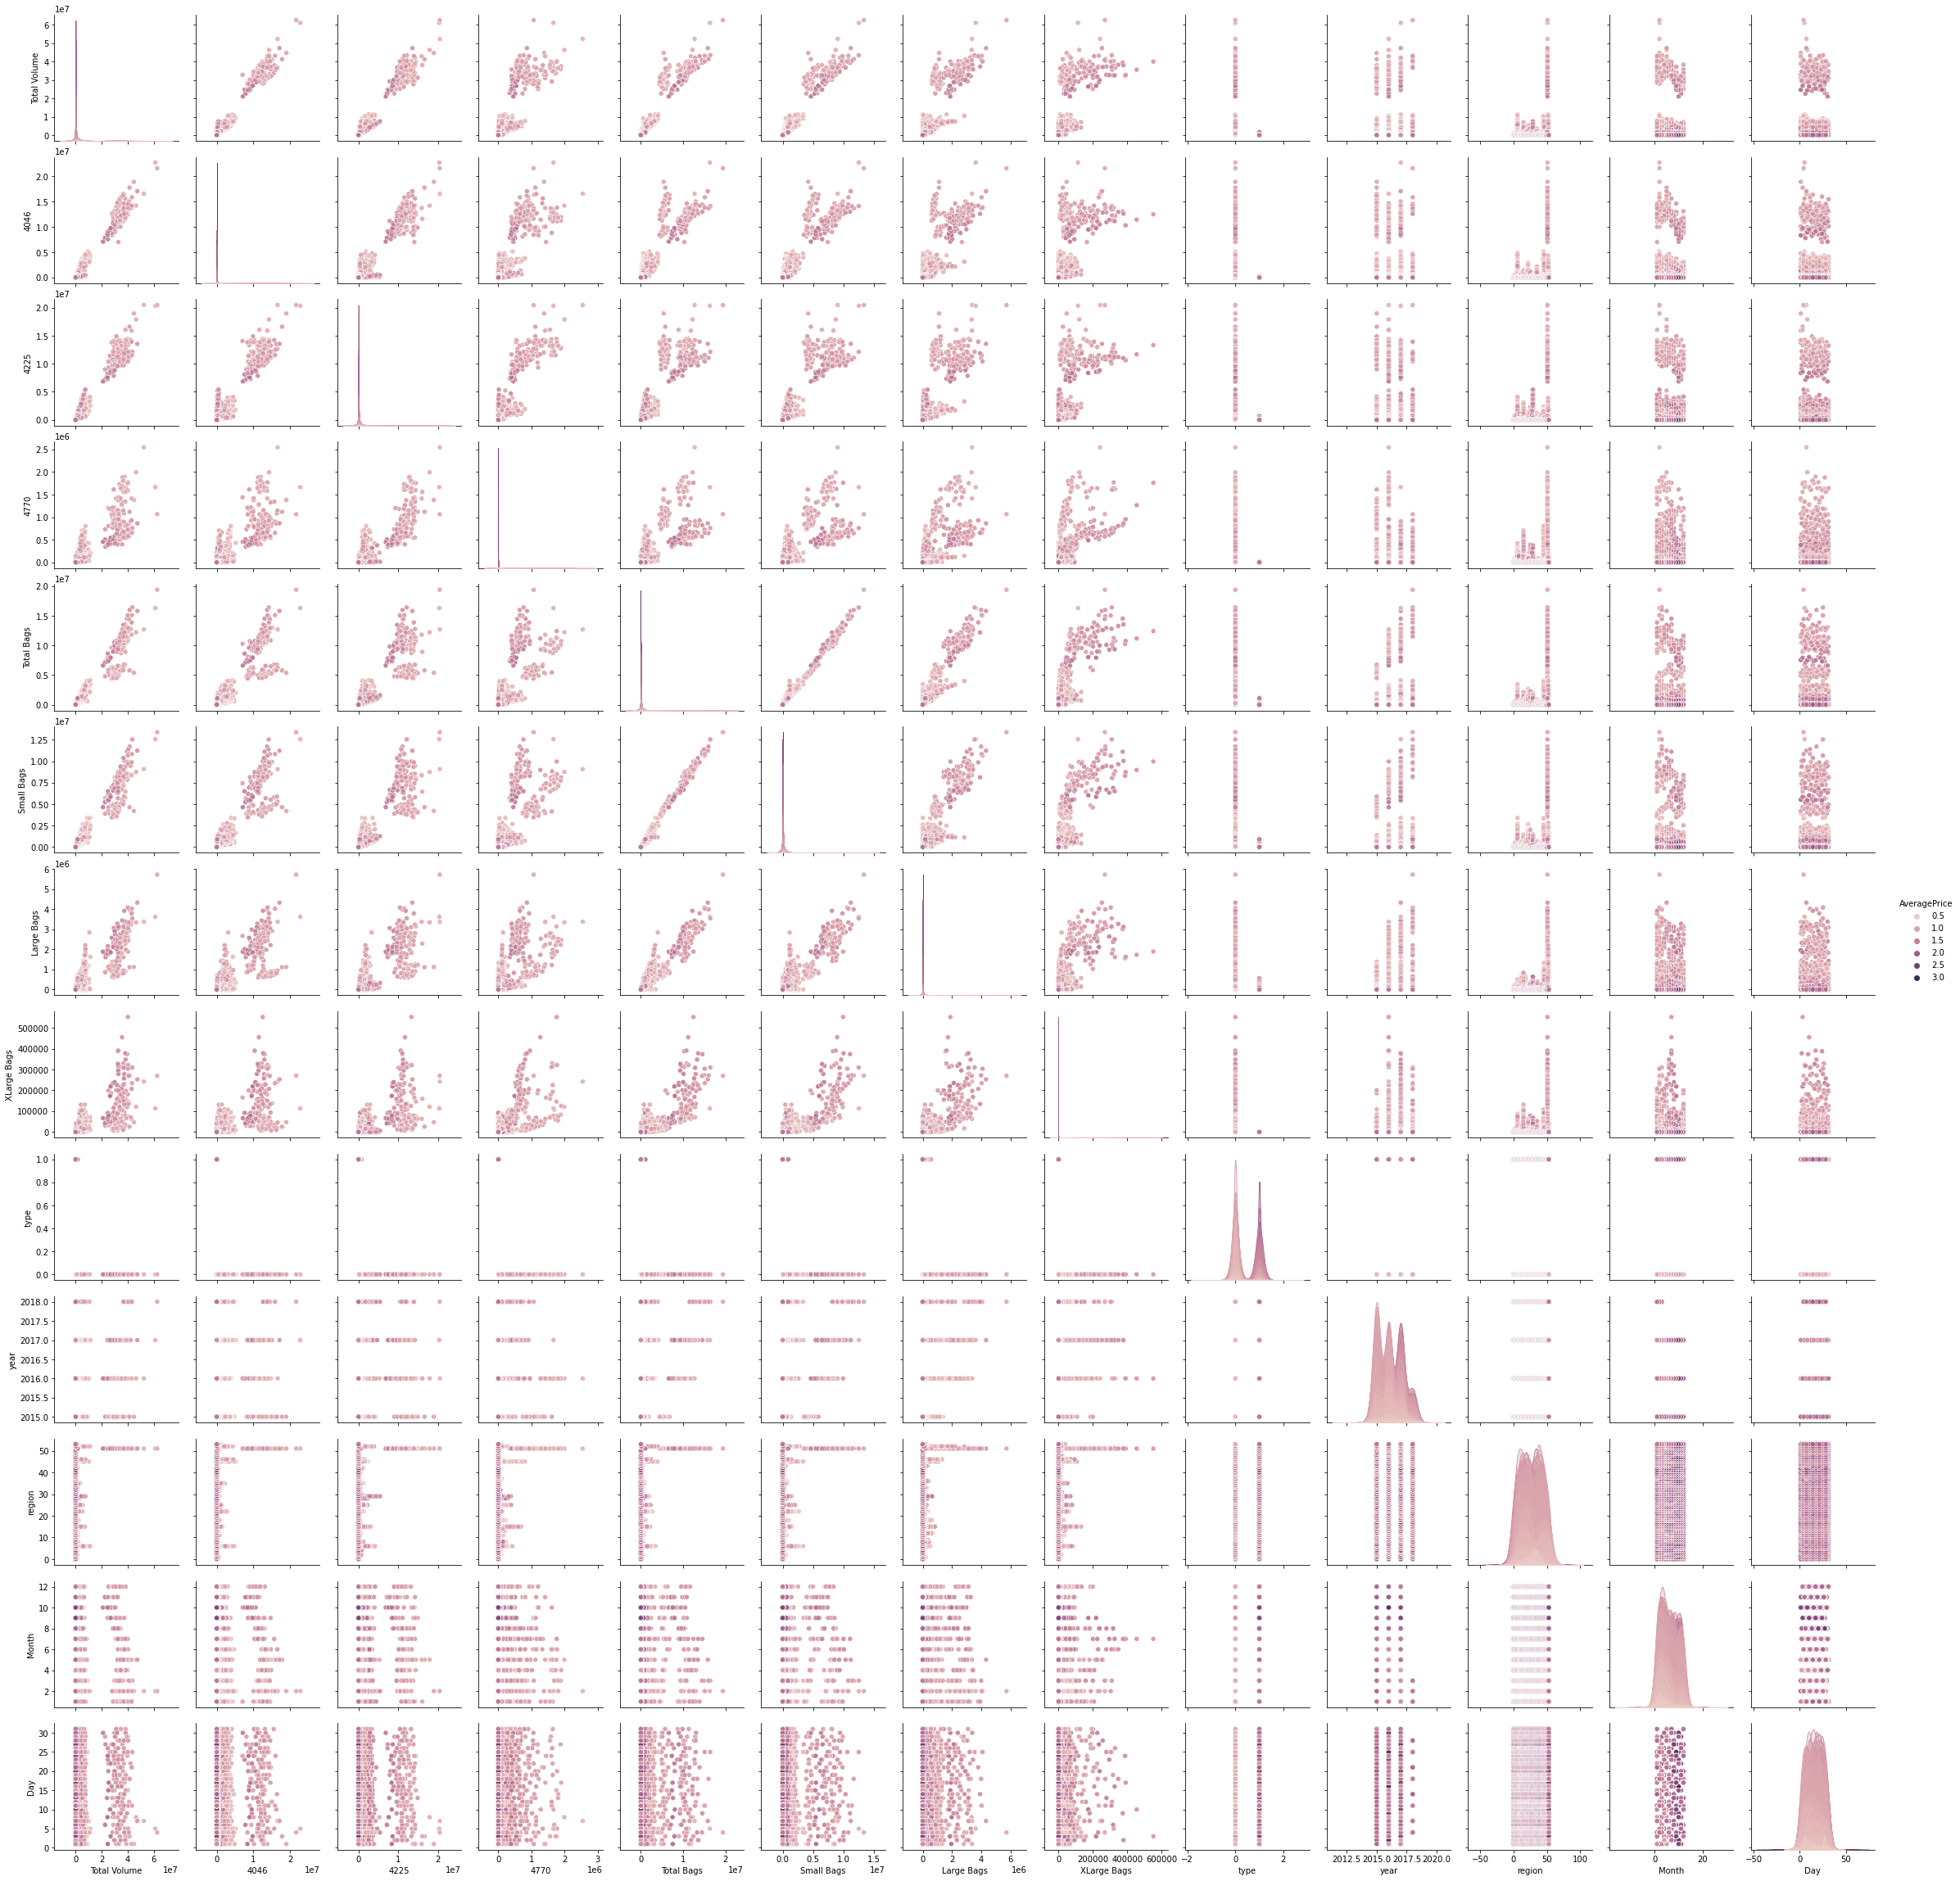

In [28]:
sns.pairplot(df,hue = 'AveragePrice')

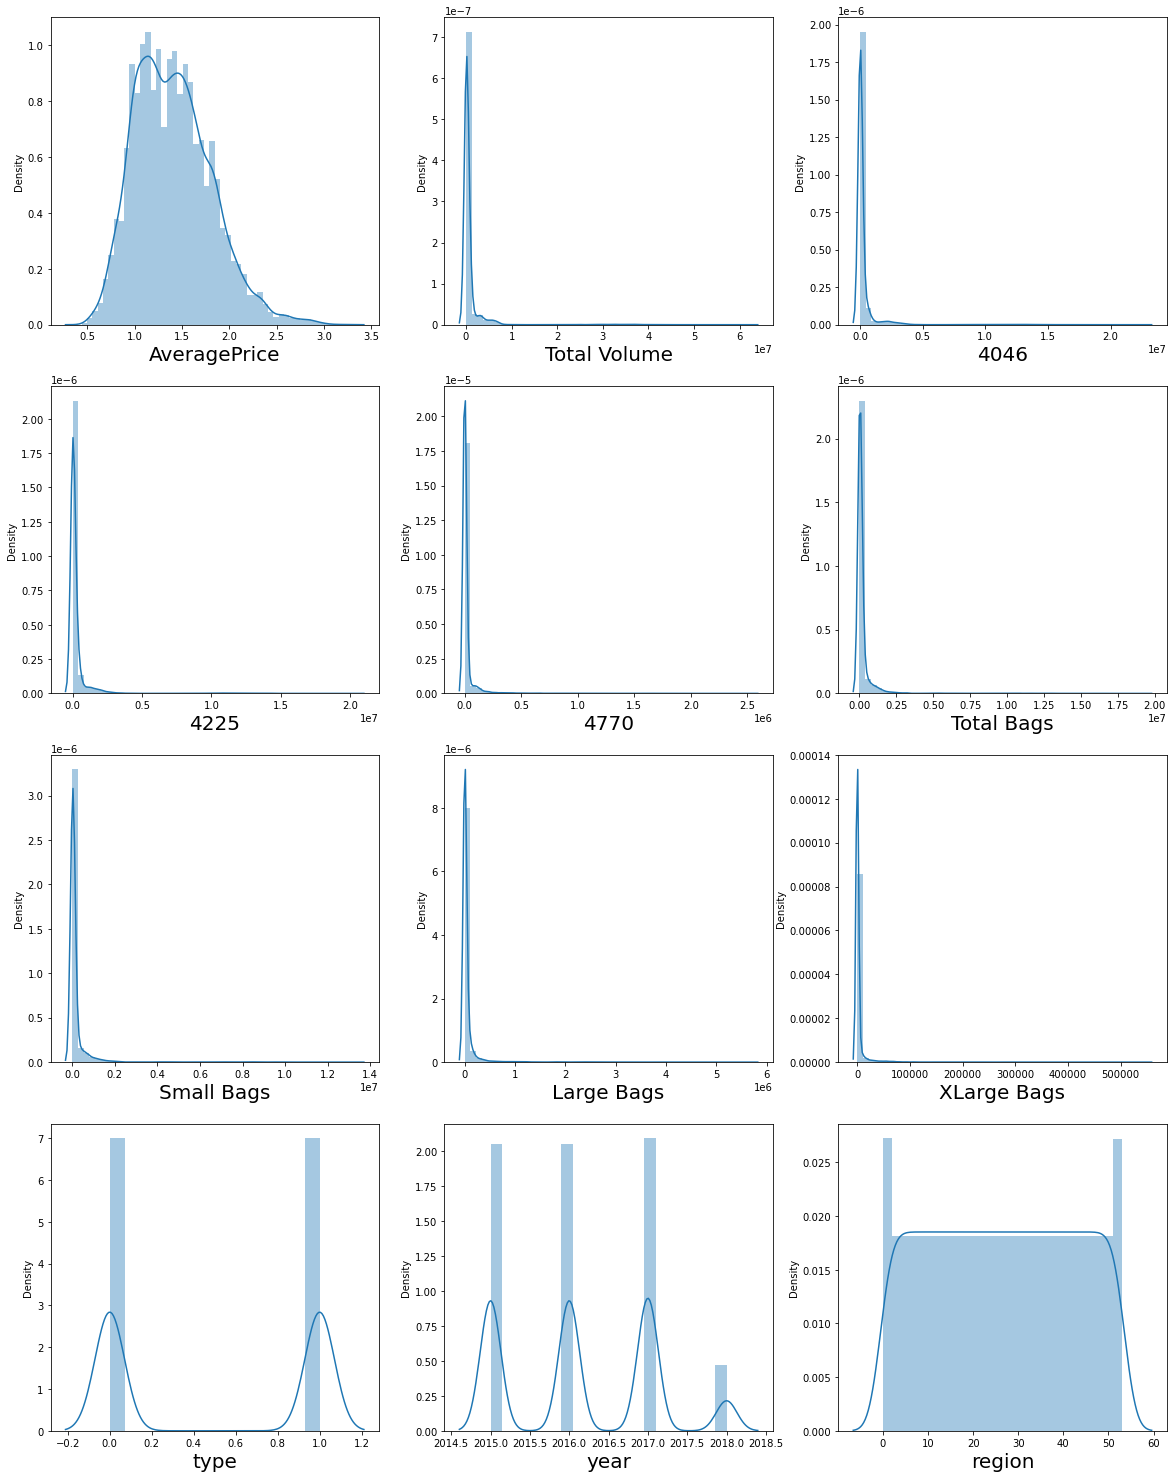

In [29]:
plt.figure(figsize = (20,26))
plotnumber = 1

for column in  df:
    if plotnumber <=12 :
        ax =plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber += 1
plt.show()

As we can see there are skewness present in the most of the columns

In [30]:
#We have to remove outliers

from scipy.stats import zscore
z = np.abs(zscore(df))

removing the outliers by zscore method

In [31]:
new_df = df[(z<3).all(axis = 1)]

In [32]:
print('Shape Before and After')
print('Shape Before:',df.shape)
print('Shape After:',new_df.shape)
print('Percentage Loss:',((df.shape[0]-new_df.shape[0])/df.shape[0])*100)

Shape Before and After
Shape Before: (18249, 14)
Shape After: (17651, 14)
Percentage Loss: 3.276891884486821


By removing the outliers in result we get 3.27 % data loss

In [33]:
x = df.drop('AveragePrice',axis = 1)
y = df['AveragePrice']

Seprating the target variable from the dataset

In [34]:
x.skew()

Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
Month            0.106617
Day              0.014310
dtype: float64

Checking the skewness and in result we get major skewness in every single column 

In [35]:
df_sk = power_transform(x)

df_sk = pd.DataFrame(df_sk,columns = x.columns)

There are major skewness in all columns , we are using power transform method to remove skewness

In [36]:
df_sk.skew()

Total Volume    0.011171
4046           -0.022679
4225           -0.017740
4770            0.032184
Total Bags     -0.001626
Small Bags      0.007058
Large Bags     -0.073809
XLarge Bags     0.793520
type            0.000329
year            0.213156
region         -0.261443
Month          -0.146584
Day            -0.208462
dtype: float64

After removing skewness by power transform method in result we get all skewness value less than 0.55

In [37]:
x = df_sk

In [38]:
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)

Scaling the data by standard scaler method

In [39]:
maxR2 = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state = i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    R2score = r2_score(y_test,pred)
    if R2score > maxR2:
        maxR2 = R2score
        maxRS = i
print('R2 score is',maxR2, 'on Random State',maxRS)

R2 score is 0.5921135466634633 on Random State 189


Finding best random state value and in result we get 189 as best random state value

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state = maxRS)

R2_Score of Linear regression: 0.5921135466634633
MAE: 0.19954241827607047
MSE: 0.06602698158047984
RMSE: 0.2569571590372213


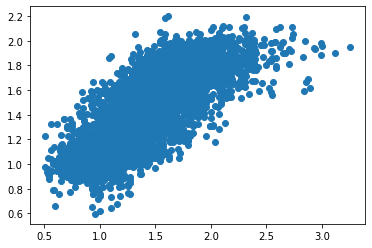

In [41]:
#Applying linear regression
lr = LinearRegression()
lr.fit(x_train, y_train)
predlr = lr.predict(x_test)
print('R2_Score of Linear regression:',r2_score(y_test,predlr))
print('MAE:', metrics.mean_absolute_error(y_test, predlr))
print('MSE:', metrics.mean_squared_error(y_test, predlr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predlr)))
plt.scatter(x=y_test,y=predlr)

By applying linear regression we get 0.59 as r2 score and 0.25 as RMSE score

And we can see scatter plot , which is not perfectly going in direction

R2_score of Random Forest: 0.8905643546004629
MAE: 0.09221339031339032
MSE: 0.01771499220907298
RMSE: 0.13309767920243004


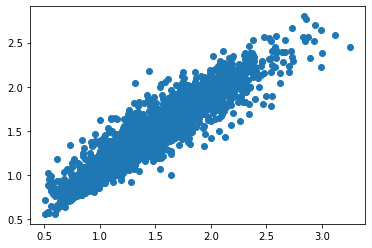

In [42]:
#Applying RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
RFR = r2_score(y_test,predrf)
print('R2_score of Random Forest:',RFR)
print('MAE:', metrics.mean_absolute_error(y_test, predrf))
print('MSE:', metrics.mean_squared_error(y_test, predrf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predrf)))
plt.scatter(x=y_test,y=predrf)

By applying RandomForestRegressor we get 0.89 as r2 score and 0.13 as RMSE score

And we can see scatter plot, we can see that the graph is in line and goes pefectly in direction

R2_score of KNN : 0.8087215066302663
MAE: 0.12672408503177734
MSE: 0.030963375849222007
RMSE: 0.17596413228047927


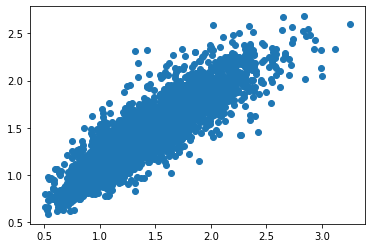

In [43]:
#Applying KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors = 5)
KNN.fit(x_train,y_train)
predknn = KNN.predict(x_test)
KNNR = r2_score(y_test,predknn)
print('R2_score of KNN :',KNNR)
print('MAE:', metrics.mean_absolute_error(y_test, predknn))
print('MSE:', metrics.mean_squared_error(y_test, predknn))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predknn)))
plt.scatter(x=y_test,y=predknn)

By applying KNeighborsRegressor we get 0.80 as r2 score and 0.17 as RMSE score

And we can see scatter plot , which have some points in another direction

R2_score of SVR : 0.7916531240374556
MAE: 0.13480062104755539
MSE: 0.033726335427421726
RMSE: 0.1836473126060431


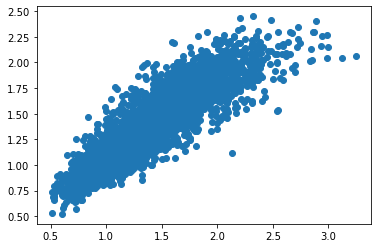

In [44]:
#Applying SVR
SVR = SVR()
SVR.fit(x_train,y_train)
predsvr = SVR.predict(x_test)
SVRR = r2_score(y_test,predsvr)
print('R2_score of SVR :',SVRR)
print('MAE:', metrics.mean_absolute_error(y_test, predsvr))
print('MSE:', metrics.mean_squared_error(y_test, predsvr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predsvr)))
plt.scatter(x=y_test,y=predsvr)

By applying KNeighborsRegressor we get 0.79 as r2 score and 0.18 as RMSE score

And we can see scatter plot , which have some points in another direction

R2_score of DT: 0.7608935639405034
MAE: 0.12662502739425816
MSE: 0.03870556651325882
RMSE: 0.1967373033089018


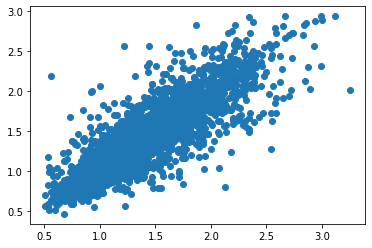

In [45]:
#Applying DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
DTR = r2_score(y_test,preddt)
print('R2_score of DT:',DTR)
print('MAE:', metrics.mean_absolute_error(y_test, preddt))
print('MSE:', metrics.mean_squared_error(y_test, preddt))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preddt)))
plt.scatter(x=y_test,y=preddt)

By applying KNeighborsRegressor we get 0.76 as r2 score and 0.19 as RMSE score

And we can see scatter plot , which have some points in another direction

As we can see that the RandomForestRegressor have lowest RMSE score which is 0.13 so due to that we use RandomForestRegressor ffor GridSearchCV 

In [46]:
#Using GtridSearchCV to RandomForestRegressor
parameters ={'n_estimators':[30,40,50,70],
             'criterion':['mse','mae'],
                 'max_features':['auto','sqrt','log2'],
             'min_samples_split':[2,4,6,5]}

In [47]:
GCV = GridSearchCV(rf,parameters,cv = 5)

In [49]:
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'mse',
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 70}

Got best parameters

r2_score of the final model is 89.03843746587182
MAE: 0.09247146300992454
MSE: 0.017744126621851895
RMSE: 0.13320708172560458


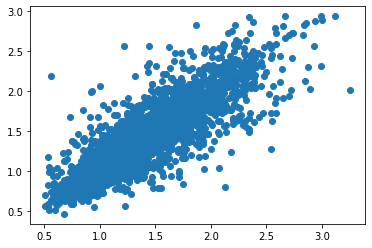

In [50]:
finalmod = RandomForestRegressor(criterion = 'mse',max_features = 'auto',min_samples_split = 2,n_estimators = 70)
finalmod.fit(x_train,y_train)
pred = finalmod.predict(x_test)
print('r2_score of the final model is',r2_score(y_test,pred)*100)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
plt.scatter(x=y_test,y=preddt)

By applying best parameters to the RandomForestRegressor  in result we get 89.03 is r2 score and 0.13 as RMSE score

In [52]:
#Saving the model
import joblib
joblib.dump(finalmod,'AvacadoPriceFinalModel.pkl')

['AvacadoPriceFinalModel.pkl']